In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import model_from_json
import matplotlib.pyplot as plt
import matplotlib
import brewer2mpl
import numpy as np
import pandas as pd
import json

Using TensorFlow backend.


In [2]:
set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
%matplotlib inline

In [3]:
jsonF = open('../../results/model_6507.json','r')
content = jsonF.read()
jsonF.close()
model = model_from_json(json.loads(content))
modelWeights = model.load_weights('../../results/modelWeights_6507.h5')

In [4]:
x_train = np.load('../../data/xTrain.npy')
y_train = np.load('../../data/yTrain.npy')

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(x, y, verbose=0)


NameError: name 'x' is not defined

In [18]:
counts = np.bincount(y_labels)

In [24]:
y_labels = [np.argmax(label) for label in y_train]
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [25]:
print zip(emotions, counts)

[('Angry', 173), ('Disgust', 183), ('Fear', 172), ('Happy', 298), ('Sad', 164), ('Surprise', 186), ('Neutral', 495)]


In [29]:
def images(start, end, x):
    fig = plt.figure(figsize=(8,10))
    for i in range(start, end+1):
        input_img = x[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,0,:,:], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

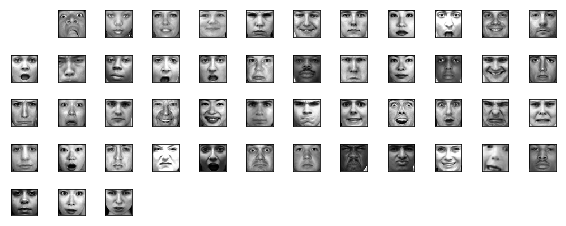

In [30]:
images(1,50,x_train)

In [34]:
def layersFilterPlot(layer, x, y):
    filters = layer.W.get_value()
    fig = plt.figure(figsize=(8, 4))
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j][0], cmap = matplotlib.cm.Blues)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()
    return plt


In [35]:
layersFilterPlot(model.layers[0], 8, 4)

TypeError: object of type 'int' has no len()

In [37]:
model.input

<tf.Tensor 'conv2d_19_input_1:0' shape=(?, 1, 48, 48) dtype=float32>

In [36]:
l0.filters

32

In [44]:
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

In [39]:
layer_dict

{u'conv2d_20': <keras.layers.convolutional.Conv2D at 0x7fc3a0a51310>,
 u'conv2d_21': <keras.layers.convolutional.Conv2D at 0x7fc3a0a515d0>,
 u'conv2d_22': <keras.layers.convolutional.Conv2D at 0x7fc3a0a0ba90>,
 u'conv2d_23': <keras.layers.convolutional.Conv2D at 0x7fc3a0a1f450>,
 u'conv2d_24': <keras.layers.convolutional.Conv2D at 0x7fc3a09c9390>,
 u'conv2d_25': <keras.layers.convolutional.Conv2D at 0x7fc3a0986a50>,
 u'conv2d_26': <keras.layers.convolutional.Conv2D at 0x7fc3a099dc10>,
 u'conv2d_27': <keras.layers.convolutional.Conv2D at 0x7fc3a09455d0>,
 u'dense_7': <keras.layers.core.Dense at 0x7fc3a08ffc10>,
 u'dense_8': <keras.layers.core.Dense at 0x7fc3a092b890>,
 u'dense_9': <keras.layers.core.Dense at 0x7fc3a08c2990>,
 u'flatten_3': <keras.layers.core.Flatten at 0x7fc3a096bc50>,
 u'max_pooling2d_7': <keras.layers.pooling.MaxPooling2D at 0x7fc3a09f4d90>,
 u'max_pooling2d_8': <keras.layers.pooling.MaxPooling2D at 0x7fc3a0972d50>,
 u'max_pooling2d_9': <keras.layers.pooling.MaxPoolin

In [42]:
kept_filters = []
for filter_index in range(0, 33):
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size form gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

Processing filter 0


NameError: name 'layer_name' is not defined

In [45]:
layer = model.layers[0]

In [47]:
layer.

TypeError: 'int' object has no attribute '__getitem__'

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn_theano.feature_extraction import fetch_overfeat_weights_and_biases


def make_visual(layer_weights):
    max_scale = layer_weights.max(axis=-1).max(axis=-1)[...,
                                                        np.newaxis, np.newaxis]
    min_scale = layer_weights.min(axis=-1).min(axis=-1)[...,
                                                        np.newaxis, np.newaxis]
    return (255 * (layer_weights - min_scale) /
            (max_scale - min_scale)).astype('uint8')


def make_mosaic(layer_weights):
    # Dirty hack (TM)
    lw_shape = layer_weights.shape
    lw = make_visual(layer_weights).reshape(8, 12, *lw_shape[1:])
    lw = lw.transpose(0, 3, 1, 4, 2)
    lw = lw.reshape(8 * lw_shape[-1], 12 * lw_shape[-2], lw_shape[1])
    return lw


def plot_filters(layer_weights, title=None, show=True):
    mosaic = make_mosaic(layer_weights)
    plt.imshow(mosaic, interpolation='nearest')
    ax = plt.gca()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if title is not None:
        plt.title(title)
    if show:
        plt.show()



In [16]:
weights = model.get_weights()
plot_filters(weights[0])
# weights, biases = fetch_overfeat_weights_and_biases(large_network=False)
# plt.figure()
# plot_filters(weights[0])
plt.show()

ValueError: total size of new array must be unchanged

(1, 1, 48, 48)


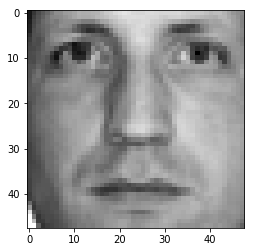

In [20]:
input_img = x_train[0:1,:,:,:] # subject0
print input_img.shape
plt.imshow(input_img[0,0,:,:], cmap='gray')

In [21]:
import theano
def plot_interlayer_outputs(input_img, layer_num1, layer_num2, colormaps=False):
    output_fn = theano.function([model.layers[layer_num1].input], 
                                 model.layers[layer_num2].output, allow_input_downcast=True)
    im = output_fn(input_img) #filtered image
    print im.shape
    n_filters = im.shape[1]
    fig = plt.figure(figsize=(12,6))
    for i in range(n_filters):
        ax = fig.add_subplot(n_filters/16,16,i+1)
        if colormaps:
            ax.imshow(im[0,i,:,:], cmap='Blues')#seq_colors[i]
        else:
            ax.imshow(im[0,i,:,:], cmap=matplotlib.cm.gray) #matplotlib.cm.gray
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

In [22]:
plot_interlayer_outputs(input_img, 0, 1, colormaps=True)

TypeError: Unknown parameter type: <class 'tensorflow.python.framework.ops.Tensor'>

In [23]:
layer = model.layers[1]

In [26]:
layer.input_shape

(None, 1, 48, 32)

In [9]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.